# Use Llama 3.2-90b-vision-instruct for multimodal AI queries in Python with watsonx

**Authors:** Anna Gutowska, Erika Russi, Jess Bozorg

In this tutorial, you will discover how to apply the [Meta Llama 3.2-90b-vision-instruct](https://www.llama.com/) model now available on [watsonx.ai](https://www.ibm.com/products/watsonx-ai) to [computer vision](https://www.ibm.com/topics/computer-vision) tasks such as image captioning and visual question answering. 

# Multimodal AI overview

## Multimodal versus unimodal AI models 

Many of us are familiar with unimodal AI applications. A popular unimodal AI tool is ChatGPT. Chatbots like ChatGPT use [natural language processing (NLP)](https://www.ibm.com/topics/natural-language-processing) to understand user questions and automate responses in real time. The type of input these unimodal [large language models (LLMs)](https://www.ibm.com/topics/large-language-models) can be applied to is limited to text.

[Multimodal artificial intelligence (AI)](https://www.ibm.com/think/topics/multimodal-ai) relies on machine learning models built on [neural networks](https://www.ibm.com/topics/neural-networks). These neural networks are capable of processing and integrating information from multiple data types using complex [deep learning](https://www.ibm.com/topics/deep-learning) techniques. These different modalities produced by the generative AI model, sometimes called gen AI models, can include text, images, video and audio input. 

Multimodal AI systems have many real-world use cases ranging from medical image diagnoses in healthcare settings using computer vision to speech recognition in translation applications. These AI technology advancements can optimize various domains. The major advantage of multimodal architectures is the ability to process different types of data. 

## Multimodal AI: how it works 

Multimodal AI entails three elements: 

**Input module**

The input module is built upon multiple unimodal neural networks for pre-processing different data types. Here, the data is prepared for machine learning algorithms performed in the fusion module.

**Fusion module**

The combining, aligning and processing of data occurs in this module. The fusion process occurs for each data modality. Several techniques are commonly used in this module. One example is early fusion, where raw data of all input types is combined. Additionally, mid-fusion is when data of different modalities are encoded at different preprocessing stages. Lastly, late fusion consolidates the data after being initially processed in the input module by different models corresponding to each modality.  

**Output module**

The output module generates results in the desired output format by making sense of the data produced in the fusion module. These outputs can take on various forms such as text, image or a combination of formats.

# Steps

**Please check out this [YouTube video](https://www.youtube.com/watch?v=3sav6vUG_XQ) that walks you through the following set up instructions in Steps 1 and 2.**

## Step 1. Set up your environment

While you can choose from several tools, this tutorial is best suited for a Jupyter Notebook. Jupyter Notebooks are widely used within data science to combine code with various data sources like text, images and data visualizations. 

This tutorial walks you through how to set up an IBM account to use a Jupyter Notebook.

1. Log in to [watsonx.ai](https://dataplatform.cloud.ibm.com/registration/stepone?context=wx&apps=all) using your IBM Cloud account.

2. Create a [watsonx.ai project](https://www.ibm.com/docs/en/watsonx/saas).

	You can get your project ID from within your project. Click the Manage tab. Then, copy the project ID from the Details section of the General page. You need this ID for this tutorial.

3. Create a [Jupyter Notebook](https://www.ibm.com/docs/en/watsonx/saas).

This step will open a Notebook environment where you can copy the code from this tutorial to implement an AI agent of your own. Alternatively, you can download this notebook to your local system and upload it to your watsonx.ai project as an asset. This Jupyter Notebook is available on [GitHub](https://github.com/IBM/ibmdotcom-tutorials/blob/main/generative-ai/multimodal-ai.ipynb).

To avoid Python package dependency conflicts, we recommend setting up a [virtual environment](https://docs.python.org/3/library/venv.html). 

## Step 2. Set up watsonx.ai Runtime service and API key

For this tutorial, we suggest using the Llama 3.2-90b-vision-instruct model with watsonx.ai to achieve similar results. You are free to use any AI model that supports multimodal learning of your choice. There are several multimodal AI models to choose from including [OpenAI’s GPT-4 V(ision)](https://platform.openai.com/docs/guides/vision) and [DALL-E 3](https://openai.com/index/dall-e-3/) as well as [Google’s Gemini](https://gemini.google.com/). Ensure you are using the appropriate API if working with other models as this tutorial is designed for watsonx.ai.

1. Create a [watsonx.ai Runtime](https://cloud.ibm.com/catalog/services/watsonxai-runtime) service instance (choose the Lite plan, which is a free instance).

2. Generate an [API Key](https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-authentication.html). 

3. Associate the watsonx.ai Runtime service to the project you created in [watsonx.ai](https://dataplatform.cloud.ibm.com/docs/content/wsj/getting-started/assoc-services.html?context=cpdaas). 

## Step 3. Install and import relevant libraries and set up your credentials

We'll need a few libraries and modules for this tutorial. Make sure to import the following ones; if they're not installed, you can resolve this with a quick pip install.

In [ ]:
#installations
%pip install image | tail -n 1
%pip install -U "ibm_watsonx_ai>=1.1.14" | tail -n 1

In [ ]:
#imports
import requests
import base64
import getpass

from PIL import Image
from ibm_watsonx_ai import Credentials
from ibm_watsonx_ai.foundation_models import ModelInference

To set our credentials, we will need the Watsonx `WATSONX_APIKEY` and `WATSONX_PROJECT_ID` you generated in Step 1. We will also set the URL serving as the API endpoint.

In [ ]:
WATSONX_APIKEY = getpass.getpass("Please enter your watsonx.ai Runtime API key (hit enter): ")

WATSONX_PROJECT_ID = getpass.getpass("Please enter your project ID (hit enter): ")

URL = "https://us-south.ml.cloud.ibm.com"

We can use the `Credentials` class to encapsulate our passed credentials.

In [ ]:
credentials = Credentials(
    url=URL,
    api_key=WATSONX_APIKEY
)

## Step 4. Encode images

In this tutorial, we will be working with several images for multimodal AI applications such as image captioning and object detection. The images we will be using can be accessed using the following URLs. We can store these URLs in a list to iteratively encode them. 

In [ ]:
url_image_1 = 'https://assets.ibm.com/is/image/ibm/hv6b0935?$original$'
url_image_2 = 'https://assets.ibm.com/is/image/ibm/c30a2d57-a62b-4bb3-818895bfe2fc7bf8?$original$'
url_image_3 = 'https://assets.ibm.com/is/image/ibm/nt170969?$original$'
url_image_4 = 'https://assets.ibm.com/is/image/ibm/fb123b45-6530-4dd9-a758-10a7ec234d9d?$original$'

image_urls = [url_image_1, url_image_2, url_image_3, url_image_4] 

To gain a better understanding of our data input, let's display the images.

url_image_0


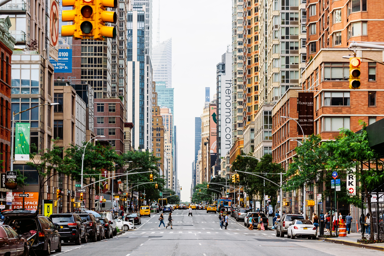

url_image_1


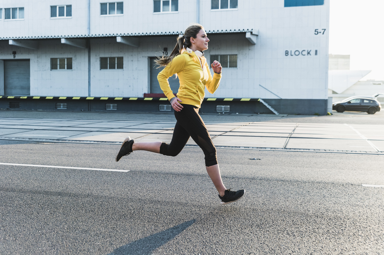

url_image_2


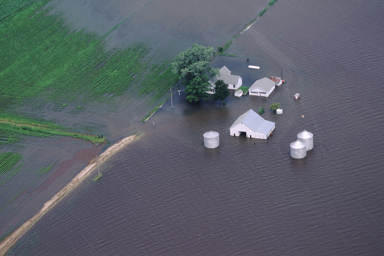

url_image_3


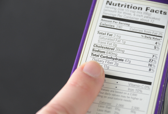

In [ ]:
for idx, url in enumerate(image_urls): 
    print(f'url_image_{idx}')
    display(Image.open(requests.get(url, stream=True).raw))

To encode these images in a way that is digestible for the LLM, we will be encoding the images to bytes that we then decode to UTF-8 representation. 

In [ ]:
encoded_images = []

for url in image_urls: 
    encoded_images.append(base64.b64encode(requests.get(url).content).decode("utf-8"))

## Step 5. Set up the API request and LLM

Now that our images can be passed to the LLM, let's set up a function for our watsonx API calls. The `augment_api_request_body` function takes the user query and image as parameters and augments the body of the API request. We will use this function in each iteration.

In [ ]:
def augment_api_request_body(user_query, image):

    messages = [
        {
            "role": "user",
            "content": [{
                "type": "text",
                "text": 'You are a helpful assistant. Answer the following user query in 1 or 2 sentences: ' + user_query
            },
            {
                "type": "image_url",
                "image_url": {
                "url": f"data:image/jpeg;base64,{image}",
                }
            }]
        }
    ]

    return messages

Let's instantiate the model interface using the `ModelInference` class. In this tutorial, we will use the the `meta-llama/llama-3-2-90b-vision-instruct` model.

In [ ]:
model = ModelInference(
    model_id="meta-llama/llama-3-2-90b-vision-instruct",
    credentials=credentials,
    project_id=WATSONX_PROJECT_ID,
    params={
        "max_tokens": 200
      }
)

## Step 6. Image captioning

Now, we can loop through our images to see the text descriptions produced by the model in response to the query, "What is happening in this image?"

In [ ]:
for i in range(len(encoded_images)):
	image = encoded_images[i]

	user_query = "What is happening in this image?"
	
	messages = augment_api_request_body(user_query, image)
	
	response = model.chat(messages=messages)

	print(response['choices'][0]['message']['content'])

This image shows a busy city street with tall buildings and cars, and people walking on the sidewalk. The street is filled with traffic lights, trees, and street signs, and there are several people crossing the street at an intersection.
The image depicts a woman in athletic attire running down the street, with a building and a car visible in the background. The woman is wearing a yellow hoodie, black leggings, and sneakers, and appears to be engaged in a casual jog or run.
The image depicts a flooded area, with water covering the ground and surrounding buildings. The flooding appears to be severe, with the water level reaching the roofs of some structures.
**Image Description**

* The image shows a close-up of a nutrition label, with a finger pointing to it.
* The label provides detailed information on the nutritional content of a specific food item, including:
	+ Calories
	+ Fat
	+ Sodium
	+ Carbohydrates
	+ Other relevant information
* The label is displayed on a white background wi

The Llama 3.2-90b-vision-instruct model was able to successfully caption each image in significant detail. 

## Step 7. Object detection

Now that we have showcased the model's ability to perform image-to-text conversion in the previous step, let's ask the model some questions that require object detection. Regarding the second image depicting the woman running outdoors, we will be asking the model, "How many cars are in this image?"

In [ ]:
image = encoded_images[1]

user_query = "How many cars are in this image?"
	
messages = augment_api_request_body(user_query, image)
	
response = model.chat(messages=messages)

print(response['choices'][0]['message']['content'])

There is one car in this image. The car is parked on the street, to the right of the building.


The model correctly identified the singular vehicle in the image. Now, let's inquire about the damage depicted in the image of flooding.

In [ ]:
image = encoded_images[2]

user_query = "How severe is the damage in this image?"

messages = augment_api_request_body(user_query, image)
	
response = model.chat(messages=messages)

print(response['choices'][0]['message']['content'])

The damage in this image is severe, with the floodwaters covering a significant portion of the land and potentially causing extensive damage to the structures and crops. The water level appears to be at least waist-deep, which could lead to significant losses for the property owners and farmers in the area.


This response highlights the value that multimodal AI has for domains like insurance. The model was able to detect the severity of the damage caused to the flooded home. This could be a powerful tool for improving insurance claim processing time. 

Next, let's ask the model how much sodium content is in the nutrition label image.  

In [ ]:
image = encoded_images[3]

user_query = "How much sodium is in this product?"

request_body = augment_api_request_body(user_query, image)

messages = augment_api_request_body(user_query, image)
	
response = model.chat(messages=messages)

print(response['choices'][0]['message']['content'])

**Sodium Content:** 640 milligrams (mg)


Great! The model was able to discern objects within the images following user queries. We encourage you to try out more queries to further demonstrate the model's performance. 

# Summary 

In this tutorial, you used the Llama 3.2-90b-vision-instruct model to perform multimodal operations including image captioning and visual question answering. For more use cases of this model, we encourage you to check out the [official documentation page](https://www.llama.com/). There you will find more information on the model’s parameters and capabilities. The Python output is important as it shows the multimodal system's ability to extract information from multimodal data.

## Try watsonx for free

Build an AI strategy for your business on one collaborative AI and data platform called IBM [watsonx](https://www.ibm.com/watsonx), which brings together new generative AI capabilities, powered by foundation models, and traditional machine learning into a powerful platform spanning the AI lifecycle. With [watsonx.ai](https://www.ibm.com/products/watsonx-ai), you can train, validate, tune, and deploy models with ease and build AI applications in a fraction of the time with a fraction of the data.

Try [watsonx.ai](https://dataplatform.cloud.ibm.com/registration/stepone), the next-generation studio for AI builders.